# Курсовая работа по дисциплине Структуры и алгоритмы обработки данных


## Выполнил студент группы БВТ2003
## Щавлев Константин Владимирович

Необходимо найти решение нескольких задач в соответствии с вариантом. 

Каждая задача имеет стоимость в 2 балла. Итоговая оценка выставляется в соответствии с таблицей:

Кол-во баллов | Оценка
:-------- |:-----
0-10 | Неудовлетворительно
12-14 | Удовлетворительно
16-18| Хорошо
20 | Отлично

In [4]:
def take_number():
    n = int(input())#получить число
    return n

def take_array():
    a = list(map(int,input().split()))#получить массив
    return a

def take_str():
    s = str(input())#получить строку
    return s

def take_mts(size):
    mtx = []
    for i in range(size):
        mtx.append(take_array())
    return mtx

def take_2_str():
    s1, s2 = map(str, input())
    return s1, s2
    
#рукописным вводом

## Вариант 4
### Задача 1
На координатной плоскости стоит робот. Изначально он расположен в точке (0,0). Его путь описывается строкой 𝑠 длины 𝑛, состоящей из символов 'L', 'R', 'U', 'D'.

Каждый из этих символов соответствует некоторому ходу:

'L' (влево): робот перемещается из точки (𝑥,𝑦) в точку (𝑥−1,𝑦);\
'R' (вправо): робот перемещается из точки (𝑥,𝑦) в точку (𝑥+1,𝑦);\
'U' (вверх): робот перемещается из точки (𝑥,𝑦) в точку (𝑥,𝑦+1);\
'D' (вниз): робот перемещается из точки (𝑥,𝑦) в точку (𝑥,𝑦−1).\
Компания, которая создала этого робота, попросила вас оптимизировать путь робота некоторым образом. Чтобы сделать это, вы можете удалить любую непустую подстроку пути. Но эта компания не хочет, чтобы покупатели заметили перемену в поведении робота. Это означает, что если до оптимизации робот заканчивал свой путь в точке (𝑥𝑒,𝑦𝑒), то после оптимизации (т.е. удаления некоторой единственной подстроки из 𝑠) робот тоже должен заканчивать свой путь в точке (𝑥𝑒,𝑦𝑒).

Эта оптимизация — малобюджетный проект, поэтому вам нужно удалить кратчайшую возможную непустую подстроку, чтобы оптимизировать путь робота так, что конечная точка его пути не изменится. Возможна ситуация, когда вы не можете оптимизировать путь. Кроме того, возможно, что после оптимизации полученный путь станет пустой строкой (т.е. удаленная подстрока — это вся строка 𝑠).

Напомним, что подстрока строки 𝑠 — это такая строка, которая может быть получена из 𝑠 с помощью удаления некоторого числа символов (возможно, нулевого) из префикса и некоторого количества символов (возможно, нулевого) из суффикса. Например, подстроками «LURLLR» являются «LU», «LR», «LURLLR», «URL», но не «RR» и «UL».

Вам нужно ответить на 𝑡 независимых наборов входных данных.

Входные данные\
Первая строка входных данных содержит одно целое число 𝑡 (1≤𝑡≤1000) — количество наборов входных данных.

Следующие 2𝑡 строк описывают наборы входных данных. Каждый набор задан двумя строками. Первая строка набора содержит одно целое число 𝑛 (1≤𝑛≤2⋅105) — длину пути робота. Вторая строка набора содержит одну строку 𝑠, состоящую из 𝑛 символов 'L', 'R', 'U', 'D' — путь робота.

Гарантируется, что сумма всех 𝑛 по всем наборам входных данных не превосходит 2⋅105 (∑𝑛≤2⋅105).

Выходные данные\
Для каждого набора входных данных выведите ответ на него. Если вы не можете удалить такую непустую подстроку, что конечная точка пути робота не изменится, выведите -1. В противном случае выведите два целых числа 𝑙 и 𝑟 такие, что 1≤𝑙≤𝑟≤𝑛 — границы подстроки, которую вы удаляете. Значение 𝑟−𝑙+1 должно быть минимальным возможным. Если существует несколько ответов, выведите любой из них.

Пример\
входные данные\
4\
4\
LRUD\
4\
LURD\
5\
RRUDU\
5\
LLDDR\
выходные данные\
1 2\
1 4\
3 4\
-1

In [2]:
directions = {
    "L": (-1, 0),
    "R": (1, 0),
    "D": (0, -1),
    "U": (0, 1)
}
 
def Robot(n, s):
    s = [directions[i] for i in s]
    point_x = 0
    point_y = 0
    history = {(0, 0): 0}
    best_substring_start = 0
    best_substring_end = n
    solution_found = False

    for j in range(n):
        point_x += s[j][0]
        point_y += s[j][1]

        if (point_x, point_y) in history:
            solution_found = True
            if best_substring_end - best_substring_start > j + 1 - history[(point_x, point_y)]:
                best_substring_end = j + 1
                best_substring_start = history[(point_x, point_y)]

        history[(point_x, point_y)] = j + 1

    if solution_found:
        print(best_substring_start + 1, best_substring_end)
    else:
        print(-1)
Robot(4, "LRUD")
Robot(4, "LURD")
# Robot(5, "RRUDU")
# Robot(5, "LLDDR")
# Robot(take_number(), take_str())

1 2
1 4
3 4



### Задача 2
Для некоторой 01-строки 𝑠 (то есть такой, что каждый символ 𝑠𝑖 — это либо '0', либо '1') выписали все пары подряд идущих символов (все подстроки длины 2). Для каждой пары (подстроки длины 2) посчитали количество символов '1' (единиц) в ней.

Вам заданы три числа:

𝑛0 — количество пар подряд идущих символов (подстрок), в которых 0 единиц;\
𝑛1 — количество пар подряд идущих символов (подстрок), в которых 1 единица;\
𝑛2 — количество пар подряд идущих символов (подстрок), в которых 2 единицы.\
Например, для строки 𝑠=«1110011110» были бы выписаны следующие подстроки: \
«11», «11», «10», «00», «01», «11», «11», «11», «10». Таким образом, 𝑛0=1, 𝑛1=3, 𝑛2=5.

Ваша задача — по заданным 𝑛0,𝑛1,𝑛2 восстановить любую подходящую 01-строку (бинарную строку) 𝑠. Гарантируется, что хотя бы одно из чисел 𝑛0,𝑛1,𝑛2 отлично от 0. Также гарантируется, что решение существует.

Входные данные\
В первой строке записано целое число 𝑡 (1≤𝑡≤1000) — количество наборов входных данных в тесте. Далее во входных данных записаны сами наборы.

Каждый набор состоит из одной строки, которая содержит три целых числа 𝑛0,𝑛1,𝑛2 (0≤𝑛0,𝑛1,𝑛2≤100; 𝑛0+𝑛1+𝑛2>0). Гарантируется, что ответ для заданных 𝑛0,𝑛1,𝑛2 существует.

Выходные данные\
Выведите 𝑡 строк. Каждая из строк должна содержать ответ в виде 01-строки (бинарной строки) на соответствующий набор входных данных. Если возможных ответов несколько, выведите любой из них.

Пример\
входные данные\
7\
1 3 5\
1 1 1\
3 9 3\
0 1 0\
3 1 2\
0 0 3\
2 0 0\
выходные данные\
1110011110\
0011\
0110001100101011\
10\
0000111\
1111\
000


In [1]:
def binarystring(a,b,c):
  if b<1:r='0'*(a+1)*(a>0)+'1'*(c+1)*(c>0)
  else:r=('1'*c)+'1'+('0'*a)+'0'+('10'*b)[:b-1]*(b>1)
  print(r)
binarystring(1,3,5)
binarystring(1,1,1)
binarystring(3,9,3)
binarystring(0,1,0)
binarystring(3,1,2)
binarystring(0,0,3)
binarystring(2,0,0)
# binarystring(take_number(),take_number(),take_number())

1111110010
1100
1111000010101010
10
1110000
1111
000



### Задача 3
У вашего одноклассника, которого вы не очень любите за его занудство, но уважаете за его ум, были обнаружены две строки: строка 𝑠 длины 𝑛 и строка 𝑡 длины 𝑚.

Последовательность индексов 𝑝1,𝑝2,…,𝑝𝑚, где 1≤𝑝1<𝑝2<…<𝑝𝑚≤𝑛, называется хорошей, если 𝑠𝑝𝑖=𝑡𝑖 для всех 𝑖 от 1 до 𝑚. Шириной последовательности называется величина max1≤𝑖<𝑚(𝑝𝑖+1−𝑝𝑖).

Помогите однокласснику найти хорошую последовательность индексов с максимальной шириной. Одноклассник обещал вам, что строки 𝑠 и 𝑡 таковы, что хотя бы одна хорошая последовательность точно существует.

Входные данные\
Первая строка входных данных содержит два числа 𝑛 и 𝑚 (2≤𝑚≤𝑛≤2⋅105) — длины строк 𝑠 и 𝑡 соответственно.

Во второй строке входных данных задана строка 𝑠, состоящая из 𝑛 строчных букв латинского алфавита.

В третьей строке задана строка 𝑡, состоящая из 𝑚 строчных букв латинского алфавита.

Гарантируется, что существует хотя бы одна хорошая последовательность индексов.

Выходные данные\
Выведите одно число — максимальную ширину хорошей последовательности.

Примеры\
входные данные\
5 3\
abbbc\
abc\
выходные данные\
3\
входные данные\
5 2\
aaaaa\
aa\
выходные данные\
4\
входные данные\
5 5\
abcdf\
abcdf\
выходные данные\
1\
входные данные\
2 2\
ab\
ab\
выходные данные\
1\
Примечание\
В первом примере существует две хороших последовательности с шириной 3: это {1,2,5} и {1,4,5}.

Во втором примере хорошая последовательность максимальной ширины — это {1,5}.

В третьем примере есть лишь одна хорошая последовательность — это {1,2,3,4,5}.

В четвёртом примере есть лишь одна хорошая последовательность — это {1,2}.


In [89]:
def MEH(n, m, s, t):        
    first = [0 for i in range(m)]
    last = [0 for i in range(m)]
 
    c= 0
    for i in range(len(t)):
        while s[c] != t[i]:
            c+=1
        first[i] = c
        c+=1  
 
    c = len(s) - 1
    for i in range(len(t)-1, -1, -1): 
        while s[c] != t[i]:
            c-=1
        last[i] = c
        c-=1
 
    
    ans = 0 
    for i in range(len(t)-1):
        ans = max(ans, last[i+1]-first[i])
    print(ans)
MEH(5, 3, 'abbbc', 'abc')
MEH(5, 2, 'aaaaa', 'aa')
MEH(5, 5, 'abcdf', 'abcdf')
MEH(2, 2, 'ab', 'ab')
MEH(take_number(),take_number(),take_str(),take_str())


3
4
1
1



### Задача 4
В Семи Королевствах n городов и n - 1 дорога, каждая дорога соединяет два города, и возможно достичь каждый город из каждого, передвигаясь по дорогам.

Теон и Яра Грейджой начинают путешествовать на лошади по дорогам из первого города. Из-за тумана они не видят, куда лошадь их везет. Когда лошадь входит в город (в том числе в первый), она направляется в один из городов, соединенных с ним. Но это странная лошадь, поэтому она пойдет только в город, в котором до этого не была. Она идет равновероятно в каждый из таких городов и останавливается, если таких городов нет.

Пусть длина каждой дороги 1. Путешествие начинается в городе 1. Чему равно математическое ожидание длины их путешествия? Формально, математическое ожидание — это ожидаемое (то есть среднее) значение. Подробнее можно прочесть по ссылке https://ru.wikipedia.org/wiki/Математическое_ожидание.

Входные данные\
Первая строка содержит одно целое число n (1 ≤ n ≤ 100000) — количество городов.

Далее следует n - 1 строк. i-я из них содержит два целых числа ui и vi (1 ≤ ui, vi ≤ n, ui ≠ vi) — номера городов, соединенных i-й дорогой.

Гарантируется, что возможно достичь каждый город из каждого, передвигаясь по дорогам.

Выходные данные\
Выведите одно число — математическое ожидание длины путешествия. Путешествие начинается в городе 1.

Ваш ответ будет считаться правильным, если его абсолютная или относительная точность не превосходит 10 - 6.

А именно, если ваш ответ равен a, а ответ жюри равен b, то ваш ответ будет зачтен, если .

Примеры\
входные данные\
4\
1 2\
1 3\
2 4\
выходные данные\
1.500000000000000\
входные данные\
5\
1 2\
1 3\
3 4\
2 5\
выходные данные\
2.000000000000000\
Примечание\
В первом примере путешествие может закончиться в городах 3 или 4 с равной вероятностью. Расстояние до городов 3 и 4 равно 1 и 2, соответственно, поэтому матожидание длины равно 1.5.

Во втором примере путешествие может закончиться в городах 4 или 5. Расстояние до обоих городов 2, поэтому матожидание равно 2.


In [3]:
def GameOfThrones(arrayA,arrayB,n):
    t={x:[] for x in range(1,n+1)}
    v=set()
    s=0
    q=[(1,1,0)]
    for _ in range(n-1):
        a,b=arrayA[_], arrayB[_]
        t[a].append(b)
        t[b].append(a)
    while q:
        u,cnt,num=q.pop()
        v.add(u)
        dep=0
        for i in t[u]:
            if i not in v:dep+=1
        if dep==0:s+=cnt*num
        else:
            for i in t[u]:
                if i not in v:q.append((i,cnt/dep,num+1))
    print(s)
GameOfThrones([1,1,2],[2,3,4],4)
GameOfThrones([1,1,3,2],[2,3,4,5],5)
# GameOfThrones(take_array(),take_array(), take_number())

1.5
2.0



### Задача 5
Дарк собирается посетить день рождения Мотарака. Дарк решил, что он хочет подарить Мотараку массив 𝑎, состоящий из 𝑛 неотрицательных целых чисел.

Дарк создал этот массив еще 1000 лет назад, поэтому некоторые его элементы пропали. Дарк знает, что Мотарак не любит, когда у двух соседних элементов большая абсолютная разница. У него не так много времени, поэтому он хочет выбрать целое число 𝑘 (0≤𝑘≤109) и заменить все пропущенные элементы в массиве 𝑎 числом 𝑘.

Обозначим за 𝑚 максимальную абсолютную разницу между всеми парами соседних элементов (то есть максимальное значение |𝑎𝑖−𝑎𝑖+1| по всем 1≤𝑖≤𝑛−1) в массиве 𝑎 после того, как Дарк заменит все пропавшие элементы на число 𝑘.

Дарк хочет выбрать число 𝑘 так, что 𝑚 будет минимально. Можете ли вы помочь ему?

Входные данные\
Входные данные состоят из нескольких тестовых случаев. Первая строка содержит единственное целое число 𝑡 (1≤𝑡≤104)  — количество тестовых случаев. Далее следует описание тестовых случаев в следующем формате.

В первой строке описания каждого тестового случае содержится одно целое число 𝑛 (2≤𝑛≤105) — размер массива 𝑎.

Во второй строке описания каждого тестового случая содержится 𝑛 целых чисел 𝑎1,𝑎2,…,𝑎𝑛 (−1≤𝑎𝑖≤109). Если 𝑎𝑖=−1, то 𝑖-е число пропало. Гарантируется, что хотя бы одно число пропало в массиве в каждом тестовом случае.

Гарантируется, что сумма 𝑛 по всем тестовым случаям не превосходит 4⋅105.

Выходные данные\
Выведите ответы для каждого тестового случая в следующем формате:

Вы должны вывести два целых числа, минимальное возможное значение 𝑚 и целое число 𝑘 (0≤𝑘≤109), которое делает максимальную абсолютную разницу между соседними элементами массива 𝑎 равной 𝑚.

Обратите внимание, что после замены всех пропавших элементов на 𝑘 максимальная абсолютная разница между всеми парами соседних элементов должна стать равной 𝑚.

Если существует более, чем одно подходящее 𝑘, вы можете вывести любое из них.

Пример\
входные данные\
7\
5\
-1 10 -1 12 -1\
5\
-1 40 35 -1 35\
6\
-1 -1 9 -1 3 -1\
2\
-1 -1\
2\
0 -1\
4\
1 -1 3 -1\
7\
1 -1 7 5 2 -1 5\
выходные данные\
1 11\
5 35\
3 6\
0 42\
0 0\
1 2\
3 4\
Примечание\
В первом тестовом случае, после замены всех пропавших элементов на 11 массив станет равным [11,10,11,12,11]. Абсолютная разница между любой парой соседних элементов равна 1. Выбрать такое значение 𝑘, чтобы максимальная абсолютная разница между всеми парами соседних элементов стала ≤0 невозможно, поэтому ответ равен 1.

В третьем тестовом случае, после замены всех пропавших элементов массива на 6 массив станет равным [6,6,9,6,3,6].

|𝑎1−𝑎2|=|6−6|=0;\
|𝑎2−𝑎3|=|6−9|=3;\
|𝑎3−𝑎4|=|9−6|=3;\
|𝑎4−𝑎5|=|6−3|=3;\
|𝑎5−𝑎6|=|3−6|=3.\
Поэтому максимальная абсолютная разница между всеми парами соседних элементов будет равна 3.


In [6]:
def HappyBirthday(n, L):
    R=[]	
    for i in range(n):
        if L[i]==-1:
            if i>0 and L[i-1]!=-1:
                R.append(L[i-1])
            if i<n-1 and L[i+1]!=-1:
                R.append(L[i+1])
    R.sort()
    if len(R)!=0:
        ans=(R[0]+R[-1])//2
    else:
        ans=0
    for i in range(n):
        if L[i]==-1: L[i]=ans
    V=abs(L[0]-L[1])
    for i in range(n-1):
        r=abs(L[i]-L[i+1])
        if V<r: V=r
    print(V,ans)
HappyBirthday(5,[-1,10,-1,12,-1])
HappyBirthday(5,[-1,40,35,-1,35])
HappyBirthday(6,[-1,-1,9,-1,3,-1])
HappyBirthday(2,[-1,-1])
HappyBirthday(2,[0,-1])
HappyBirthday(4,[1,-1,3,-1])
HappyBirthday(7,[1,-1,7,5,2,-1,5])
# HappyBirthday(take_number(),take_array())

1 11
5 37
3 6
0 0
0 0
1 2
3 4



### Задача 6
Вам задан массив 𝑎, состоящий из 𝑛 целых чисел.

Вы можете удалить не более одного элемента из этого массива. Таким образом, после этой операции длина массива равна либо 𝑛−1, либо 𝑛.

Ваша задача — посчитать максимально возможную длину строго возрастающего последовательного подмассива получившегося массива.

Напомним, что последовательным подмассивом 𝑎 с индексами от 𝑙 до 𝑟 называется 𝑎[𝑙…𝑟]=𝑎𝑙,𝑎𝑙+1,…,𝑎𝑟. Массив 𝑎[𝑙…𝑟] называется строго возрастающим, если 𝑎𝑙<𝑎𝑙+1<⋯<𝑎𝑟.

Входные данные\
Первая строка входных данных содержит одно целое число 𝑛 (2≤𝑛≤2⋅105) — количество элементов в 𝑎.

Вторая строка входных данных содержит 𝑛 целых чисел 𝑎1,𝑎2,…,𝑎𝑛 (1≤𝑎𝑖≤109), где 𝑎𝑖 равно 𝑖-му элементу 𝑎.

Выходные данные\
Выведите одно целое число — максимально возможную длину строго возрастающего последовательного подмассива массива 𝑎 после удаления не более одного элемента.

Примеры\
входные данные\
5\
1 2 5 3 4\
выходные данные\
4\
входные данные\
2\
1 2\
выходные данные\
2\
входные данные\
7\
6 5 4 3 2 4 3\
выходные данные\
2\
Примечание\
В первом примере можно удалить 𝑎3=5. Тогда получившийся массив будет равен [1,2,3,4] и длина его наибольшего возрастающего подмассива будет равна 4.



In [7]:
def Delete(n, arr):
    d = [1]*n
    d2 = [1]*n
    for i in  range(1,n):
        if arr[i] > arr[i-1]:
            d[i] = d[i-1]+1
            d2[i] = d2[i-1] +1
        
        if i >=2 and  arr[i] > arr[i-2]:
            d2[i] = max(d2[i],d[i-2]+1)
    
    print(max(max(d2),max(d)))
Delete(5,[1,2,5,3,4])
Delete(2,[1,2])
Delete(7,[6,5,4,3,2,4,3])
# Delete(take_number(), take_array())

4
2
2



### Задача 7
У Коли есть массив целых чисел 𝑎1,𝑎2,…,𝑎𝑛. Числа в массиве могут быть и положительными, и отрицательными, но так как Коля не любит число 0, то таких чисел в его массиве нет.

Коле не нравится, что сумма элементов на некоторых подотрезках его массива может быть равна 0. Под подотрезком массива следует понимать некоторую непустую последовательность подряд идущих элементов массива.

Вы должны помочь Коле и сделать так, чтобы в его массиве не было подотрезков с суммой элементов равной 0. Для этого вы можете вставлять в его массив произвольные целые числа между любыми соседними элементами массива (числа могут быть любые: положительные, отрицательные, 0, любые по абсолютной величине, даже не представимые в стандартных типах данных во многих языках программирования).

Определите минимальное количество произвольных целых чисел, которые нужно добавить в массив Коли таким образом, чтобы после этого в массиве не было подотрезков с суммой элементов равной 0.

Входные данные\
В первой строке следует целое число 𝑛 (2≤𝑛≤200000) — количество элементов в массиве Коли.

Во второй строке следует 𝑛 целых чисел 𝑎1,𝑎2,…,𝑎𝑛 (−109≤𝑎𝑖≤109,𝑎𝑖≠0) — описание массива Коли.

Выходные данные\
Выведите минимальное количество произвольных целых чисел, которые нужно добавить в массив Коли таким образом, чтобы после этого в массиве не было подотрезков с суммой элементов равной 0.

Примеры\
входные данные\
4\
1 -5 3 2\
выходные данные\
1\
входные данные\
5\
4 -2 3 -9 2\
выходные данные\
0\
входные данные\
9\
-1 1 -1 1 -1 1 1 -1 -1\
выходные данные\
6\
входные данные\
8\
16 -5 -11 -15 10 5 4 -4\
выходные данные\
3\
Примечание\
В первом примере есть один подотрезок, сумма элементов которого равна 0. Он начинается со второго элемента и заканчивается в четвертом элементе. \
Достаточно добавить один элемент, чтобы в массиве не было подотрезков с суммой элементов равной нулю. Например, можно добавить число 1 между вторым и третьим элементами массива.

Во втором примере изначально нет подотрезков с суммой элементов равной 0, поэтому никаких чисел в массив добавлять не нужно.


In [90]:
def notZero(lenArray, Array):
    d = set()
    d.add(0)
    cur = 0
    ans = 0
    for i in range(lenArray):
        cur += Array[i]
        if cur in d:
            ans += 1
            d = set()
            d.add(0)
            cur = Array[i]
        d.add(cur)
    print(ans)
notZero(4, [1, -5, 3, 2])
notZero(5, [4, -2, 3, -9, 2])
notZero(9, [-1, 1, -1, 1,-1, 1, 1, -1, -1])
notZero(8, [16, -5, -11, -15, 10, 5, 4, -4])
# notZero(take_number(), take_array())

1
0
6
3



### Задача 8
В линию выстроены 𝑛 монстров, пронумерованных числами с 1 по 𝑛. У 𝑖-го монстра есть ℎ𝑖 очков здоровья (hp). Вы можете атаковать с силой, равной 𝑎 hp, а ваш соперник может атаковать с силой, равной 𝑏 hp.

Вы и ваш соперник сражаетесь с этими монстрами. Сначала вы и ваш соперник идете к первому монстру и сражаетесь с ним до тех пор, пока он не будет мертв, затем вы и ваш соперник отправляетесь ко второму монстру и сражаетесь с ним до тех пор, пока и он не будет мертв, и так далее. Смерть монстра наступает, когда значение его hp становится меньшим или равным 0.

Сражение с монстром происходит поочередно.

Вы атакуете монстра с силой 𝑎 hp. Если он погибает после вашего удара, вы получаете одно очко и затем вы и соперник переходите к следующему монстру.
Ваш соперник атакует монстра с силой 𝑏 hp. Если монстр погибает после этой атаки, никто не получает очко и вы с соперником переходите к следующему монстру.\
У вас есть некоторая секретная техника, с помощью которой можно заставить вашего соперника пропустить свой ход. Вы можете использовать эту технику не более, чем 𝑘 раз всего (например, если есть два монстра и 𝑘=4, то вы можете использовать эту технику 2 раза во время сражения с первым монстром и 1 один раз — со вторым, но не 2 раза с первым монстром и 3 раза со вторым).

Ваша задача — определить максимальное число очков, которое вы можете получить, если будете использовать секретную технику оптимально.

Входные данные\
Первая строка входных данных содержит четыре целых числа 𝑛,𝑎,𝑏 and 𝑘 (1≤𝑛≤2⋅105,1≤𝑎,𝑏,𝑘≤109) — количество монстров, сила вашей атаки, сила атаки соперника и количество раз, которое вы можете использовать секретную технику.

Вторая строка входных данных содержит 𝑛 целых чисел ℎ1,ℎ2,…,ℎ𝑛 (1≤ℎ𝑖≤109), где ℎ𝑖 количество очков здоровья у 𝑖-го монстра.

Выходные данные\
Выведите одно целое число — максимальное число очков, которое вы можете получить, если будете использовать секретную технику оптимально.

Примеры\
входные данные\
6 2 3 3\
7 10 50 12 1 8\
выходные данные\
5\
входные данные\
1 1 100 99\
100\
выходные данные\
1\
входные данныеСкопировать
7 4 2 1\
1 3 5 4 2 7 6\
выходные данные\
6


In [95]:
def Monsters(n,a,b,k, array):
    ans=int(0)
    for i in range(n):
        array[i]=array[i]%(a+b)
        if(array[i]==0):
            array[i]=a+b
    array.sort()
    for i in range(n):
        if(array[i]>a):
            array[i]=array[i]-a
            if(k>=int((array[i]+a-1)/a)):
                k=k-(int((array[i]+a-1)/a))
                ans=ans+1
        else:
            ans=ans+1
    print(ans)

Monsters(6,2,3,3,[7,10,50,12,1,8])
Monsters(1,1,100,99,[100])
Monsters(7,4,2,1,[1,3,5,4,2,7,6])
# Monsters(take_number(),take_number(),take_number(),take_number(),take_array())

5
1
6



### Задача 9
Олимпийские игры только что начались, и Федерико с нетерпением ждет начала марафонского забега.

В марафоне будут участвовать 𝑛 спортсменов, от 1 до 𝑛, и все они в прошлом участвовали в 5 важных марафонах, пронумерованных от 1 до 5. Для каждого 1≤𝑖≤𝑛 и 1≤𝑗≤5 Федерико помнит, что спортсмен 𝑖 занял место 𝑟𝑖,𝑗 в марафоне 𝑗 (например, 𝑟2,4=3 означает, что спортсмен 2 был третьим в марафоне 4).

Федерико считает, что спортсмен 𝑥 превосходит спортсмена 𝑦, если спортсмен 𝑥 занял лучшее место, чем спортсмен 𝑦, по крайней мере в 3 прошлых марафонах, т.е. 𝑟𝑥,𝑗<𝑟𝑦,𝑗 по крайней мере для 3 различных значений 𝑗.

Федерико считает, что у спортсмена хорошие шансы получить золотую медаль на Олимпийских играх, если он превосходит всех остальных спортсменов.

Найдите любого спортсмена, у которого хорошие шансы получить золотую медаль (то есть спортсмена, который превосходит всех остальных спортсменов), или определите, что такого спортсмена нет.

Входные данные\
Первая строка содержит одно целое число 𝑡 (1≤𝑡≤1000) — количество наборов входных данных. Затем следуют 𝑡 наборов входных данных.

Первая строка каждого набора входных данных содержит одно целое число 𝑛 (1≤𝑛≤50000) — количество спортсменов.

Затем следуют 𝑛 строк, каждая из которых описывает места одного спортсмена.

𝑖-я из этих строк содержит 5 целых чисел 𝑟𝑖,1,𝑟𝑖,2,𝑟𝑖,3,𝑟𝑖,4,𝑟𝑖,5 (1≤𝑟𝑖,𝑗≤50000) — места спортсмена 𝑖 в последних 5 марафонах. Гарантируется, что в каждом из 5 прошедших марафонов 𝑛 спортсменов заняли различные места, т.е. для каждого 1≤𝑗≤5, 𝑛 значений 𝑟1,𝑗,𝑟2,𝑗,…,𝑟𝑛,𝑗 попарно различны.

Гарантируется, что сумма 𝑛 по всем наборам входных данных не превышает 50000.

Выходные данные\
Для каждого набора входных данных выведите одно целое число — номер спортсмена, у которого хорошие шансы получить золотую медаль (то есть спортсмена, который превосходит всех остальных спортсменов). Если таких спортсменов нет, выведите −1. Если таких спортсменов больше, чем один, выведите любого из них.

Пример\
входные данные\
4\
1\
50000 1 50000 50000 50000\
3\
10 10 20 30 30\
20 20 30 10 10\
30 30 10 20 20\
3\
1 1 1 1 1\
2 2 2 2 2\
3 3 3 3 3\
6\
9 5 3 7 1\
7 4 1 6 8\
5 6 7 3 2\
6 7 8 8 6\
4 2 2 4 5\
8 3 6 9 4\
выходные данные\
1\
-1\
1\
5\
Примечание\
Объяснение первого набора входных данных: Есть только один спортсмен, поэтому он превосходит всех остальных (так как больше никого нет), и поэтому у него хорошие шансы получить золотую медаль.

Пояснение второго набора входных данных: Есть 𝑛=3 спортсменов.

Спортсмен 1 превосходит спортсмена 2. Действительно, спортсмен 1 лучше спортсмена 2 в марафонах 1, 2 и 3.\
Спортсмен 2 превосходит спортсмена 3. Действительно, спортсмен 2 превосходит спортсмена 3 в марафонах 1, 2, 4 и 5.\
Спортсмен 3 превосходит спортсмена 1. Действительно, спортсмен 3 лучше, чем спортсмен 1 в марафонах 3, 4 и 5.\
Объяснение третьего набора входных данных: Есть 𝑛=3 спортсменов.

Спортсмен 1 превосходит спортсменов 2 и 3. Поскольку он превосходит всех остальных спортсменов, у него хорошие шансы получить золотую медаль.\
Спортсмен 2 превосходит спортсмена 3.\
Спортсмен 3 не превосходит ни одного другого спортсмена.\
Пояснение четвертого набора входных данных: Есть 𝑛=6 спортсменов.

Спортсмен 1 превосходит спортсменов 3, 4, 6.\
Спортсмен 2 превосходит спортсменов 1, 4, 6.\
Спортсмен 3 превосходит спортсменов 2, 4, 6.\
Спортсмен 4 не превосходит ни одного другого спортсмена.\
Спортсмен 5 превосходит спортсменов 1, 2, 3, 4, 6. Поскольку он превосходит всех остальных спортсменов, у него хорошие шансы получить золотую медаль.\
Спортсмен 6 превосходит только спортсмена 4.


In [6]:
def compare(r, i , j):
	cnt = 0
	for i1 in range(5):
		if(r[i][i1] < r[j][i1]):
			cnt += 1
	return (cnt >= 3)

def GoldenRuhs(n, mtx):

	cur = 0
	for i in range(1, n):
		if(not compare(mtx, cur, i)):
			cur = i
 
	for i in range(n):
		if(i != cur and not compare(mtx, cur, i)):
			cur = -2
			break
	print(cur + 1)

mtx = [ [50000, 1, 50000, 50000],
                            ]
GoldenRuhs(1, mtx)
mtx = [ [10, 10, 20, 30, 30],
        [20, 20, 30, 10, 10],
        [30, 30, 10, 20, 20],
                            ]
GoldenRuhs(3, mtx)
mtx = [ [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
                            ]
GoldenRuhs(3, mtx)
mtx = [ [ 9, 5, 3, 7, 1],
		[ 7, 4, 1, 6, 8],
		[ 5, 6, 7, 3, 2],
		[ 6, 7, 8, 8, 6],
		[ 4, 2, 2, 4, 5],
		[ 8, 3, 6, 9, 4],
						]
GoldenRuhs(6, mtx)

# n = take_number()
# GoldenRuhs(n, take_mts(n))

1
-1
1
5
1



### Задача 10
Лео-младший рисует в тетради в клеточку (каждая страница размечена квадратной сеткой). Можно считать, что страницы бесконечно большие в любом направлении.

Лео-младший закрашивает некоторые клетки на странице серым цветом. Он считает получившийся рисунок красивым, если выполнены следующие условия:

Рисунок связен, то есть, из любой серой клетки можно попасть в любую другую по цепочке из серых клеток, в которой каждые две последовательные клетки — соседи (то есть, имеют общую сторону).\
Каждая серая клетка имеет чётное количество серых соседей.
В рисунке ровно 𝑛 серых клеток, у которых все соседи серые. Количество остальных серых клеток может произвольным (но разумным, чтобы их можно было перечислить).\
Лео-младший пытается нарисовать красивый рисунок для выбранного значения 𝑛. Помогите ему, найдите любой пример красивого рисунка.

Чтобы вывести координаты клеток в ответе, предполагайте, что на странице введена декартова система координат, в которой одна из клеток является началом координат (0,0), оси 0𝑥 и 0𝑦 перпендикулярны и сонаправлены линиям сетки, и шаг единичной длины в любом направлении вдоль любой оси ведёт в соседнюю клетку.

Входные данные\
В единственной строке записано одно целое число 𝑛 (1≤𝑛≤500) — количество серых клеток, у которых все соседи серые.

Выходные данные\
В первой строке выведите одно целое число 𝑘 — количество серых клеток в вашем рисунке. По техническим причинам 𝑘 не должно превосходить 5⋅105.

Каждая из следующих 𝑘 строк должна содержать две целых числа — координаты очередной серой клетки в вашем рисунке. Все перечисленные клетки должны быть различны, и рисунок должен отвечать всем требованиям, перечисленным выше. Все координаты не должны превосходить 109 по абсолютной величине.

Можно показать, что существует ответ, который удовлеторяет всем требованиям и укладывается в ограничение на 𝑘.

Пример\
входные данные\
4\
выходные данные\
12\
1 0\
2 0\
0 1\
1 1\
2 1\
3 1\
0 2\
1 2\
2 2\
3 2\
1 3\
2 3\
Примечание\
Ответ для примера изображен ниже:
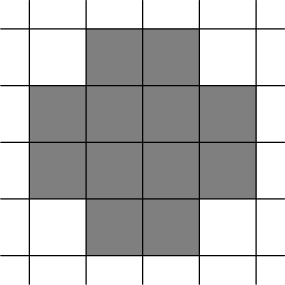


In [10]:
def Paints(n):
    print(n*3+4)
    for i in range(n+2):
        print(i,i)
    for i in range(n+1):
        print(i,i+1)
        print(i+1,i)
Paints(3)
# Paints(take_number())

13
0 0
1 1
2 2
3 3
4 4
0 1
1 0
1 2
2 1
2 3
3 2
3 4
4 3
